
# Project: No show appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### I worked on No show appointment dataset that is found on kaggle , the dataset contains many attributes in order to determine which appointments has been successfully done , the dataset contains more than 100,000 record (Appointment)

### after reading the dataset and understanding the attributes well , I decided to ask these questions

### Q1:Which of the columns(attributes) are associated with the No show column ?

### Q2:Does the age contributes in the probability of having different diseases ?

### Q3:Does the gender contributes in the probability of having different diseases ?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


###  when describing the data we found that there is negative age values which doesn't make sense so we should remove these records later in the cleaning process

In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### It is good to see here that there is no null values in any column which seems pretty cool , We need to change the datatype of dates later to datetime instead of strings inorder to deal with them in more professional way

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### It is good to see that here also there is no duplicate rows among all the records in the dataset

In [5]:
print(sum(df.duplicated()))

0


In [6]:
df.groupby('No-show').count()["Gender"]

No-show
No     88208
Yes    22319
Name: Gender, dtype: int64

In [7]:
df["SMS_received"].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

### We can see from the cell below that all the time that comes after the date on the appointment day column are the same so we should remove it as it will not be useful during analysis

In [8]:
L=[]
for x in df["AppointmentDay"]:
    L.append(x.split('T')[1])
s=set(L)
print(len(s))

1


### In the cell below we kept only the date component in ScheduledDay and AppointmentDay columns

In [9]:
def extract_date_only(col):
    df[col]=df[col].apply(lambda x: x.split("T")[0]) 
    df[col]=pd.to_datetime(df[col])
    

In [10]:
extract_date_only('ScheduledDay')
extract_date_only('AppointmentDay')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### We need to subtract the appointment day from the scheduled day in order to get the days between the appointment and scheduled day and make a new column called difference_of_days in order to use it in further steps during analysis

In [11]:
df["difference_of_days"]=(df["AppointmentDay"]-df["ScheduledDay"]).dt.days
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,difference_of_days
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


### From the cell below we can see that there are 5 records where the appointment date came before the scheduled one which is not possible in real life so we should remove this records later in cleaning process

In [12]:
print(len(df.query("difference_of_days < 0")))


5


In [13]:
df["difference_of_days"].value_counts()
#df["difference_of_days"].median()

 0      38563
 2       6725
 4       5290
 1       5213
 7       4906
 6       4037
 5       3277
 14      2913
 3       2737
 8       2332
 21      1861
 28      1706
 13      1682
 9       1605
 15      1503
 10      1391
 20      1187
 22      1173
 16      1151
 12      1115
 17      1107
 29      1089
 19      1044
 18      1021
 27      1013
 11       987
 35       963
 23       822
 34       808
 26       731
        ...  
 98         5
 112        5
 103        5
 109        5
 108        5
 102        4
-1          4
 105        4
 96         4
 119        4
 122        3
 92         3
 115        2
 93         2
 110        2
 107        2
 97         2
 94         2
 123        1
 101        1
 126        1
 125        1
 139        1
 151        1
 132        1
 117        1
 146        1
 82         1
-6          1
 127        1
Name: difference_of_days, Length: 131, dtype: int64


### Data Cleaning 

### Here we gonna drop the columns that will not be useful during our analysis process.

In [14]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['PatientId','AppointmentID',"Neighbourhood","AppointmentDay","ScheduledDay"],axis=1,inplace=True)
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,difference_of_days
0,F,62,0,1,0,0,0,0,No,0
1,M,56,0,0,0,0,0,0,No,0
2,F,62,0,0,0,0,0,0,No,0
3,F,8,0,0,0,0,0,0,No,0
4,F,56,0,1,1,0,0,0,No,0


### In the cell below I removed all the records with ages less than 0 which is found to be only one record

In [15]:
df=df.query("Age>=0")

In [16]:
len(df)

110526

### As I mentioned before that I made a new column called difference of days which represent how many days between the scheduled and appointment days , I found that there is 5 records having appointment days before their scheduled day which is a mistake by sure so i removed these 5 records

In [17]:
df=df.query("difference_of_days >=0")

In [18]:
len(df)

110521

### I replaced the No show column name to show to be more readable and replaced the values in show column to 0's and 1's where 1 represents the yes value and  0 represents the no value

In [19]:
df.rename(columns={"No-show":"show"},inplace=True)
df['show']=df['show'].apply(lambda x:1 if x=="No" else 0)

In [20]:
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,difference_of_days
0,F,62,0,1,0,0,0,0,1,0
1,M,56,0,0,0,0,0,0,1,0
2,F,62,0,0,0,0,0,0,1,0
3,F,8,0,0,0,0,0,0,1,0
4,F,56,0,1,1,0,0,0,1,0


<a id='eda'></a>
## Exploratory Data Analysis

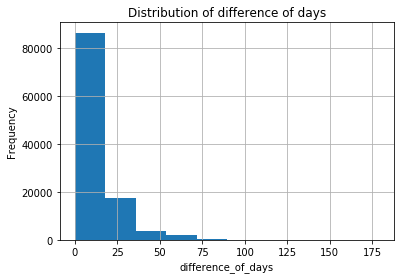

In [21]:
ax=df['difference_of_days'].hist();
ax.set_xlabel('difference_of_days');
ax.set_ylabel('Frequency');
ax.set_title('Distribution of difference of days');

### In the figure above we see the distribution of the difference of days between the appointment date and the scheduled date and we can see that frequency decreases as the difference of days increases


### Which of the columns(attributes) are associated with the No show column ?

0.700387542769
0.903243984447


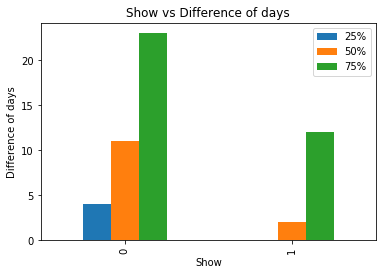

In [22]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
diff_of_days_above_median=df.query('difference_of_days >= difference_of_days.median()')["show"].mean()
diff_of_days_below_median=df.query('difference_of_days < difference_of_days.median()')["show"].mean()
print(diff_of_days_above_median)
print(diff_of_days_below_median)
#df["difference_of_days"].describe()
five_summary=["25%","50%","75%"]
ax=df.groupby('show')["difference_of_days"].describe()[five_summary].plot(kind='bar');
ax.set_xlabel("Show");
ax.set_ylabel("Difference of days");
ax.set_title("Show vs Difference of days");

### The figure above shows the relation between the show appoinment column and difference of days column , we can see from the figure above that 

0.82351048426
0.772059362404


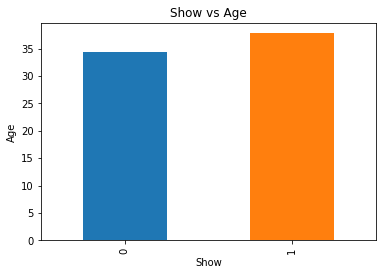

In [23]:
k1=df.query('Age >= Age.median()')["show"].mean()
k2=df.query('Age < Age.median()')["show"].mean()
print(k1)
print(k2)
ax=df.groupby('show')['Age'].mean().plot(kind='bar');
ax.set_xlabel("Show");
ax.set_ylabel("Age");
ax.set_title("Show vs Age");

### The figure above shows the relation between the show appoinment column and the age column , we can see that the people who have higher ages seems to attend the  appointment slightly higher than people with lower ages

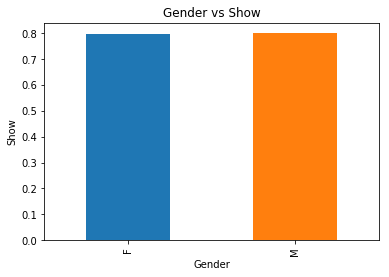

In [24]:
#df.groupby('Gender').count()["Age"]
#df.groupby('Gender')["No-show"].mean()
ax=df.groupby('Gender')["show"].mean().plot(kind="bar");
ax.set_ylabel("Show");
ax.set_xlabel("Gender");
ax.set_title("Gender vs Show");

### The figure above shows the relation between the show appoinment column and the gender column , we can see that the type of gender shows no relation with the show appointment column 

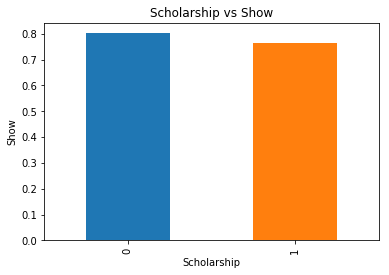

In [25]:
ax=df.groupby('Scholarship')["show"].mean().plot(kind="bar");
ax.set_ylabel("Show");
ax.set_xlabel("Scholarship");
ax.set_title("Scholarship vs Show");

### The figure above shows the relation between the show appoinment column and the Scholarship column , we can see that people with scholarships has slightly less show appointment ratio

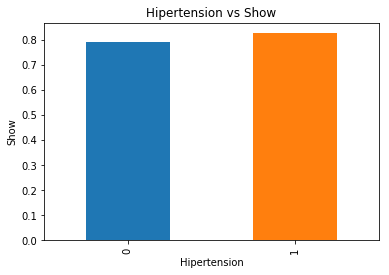

In [26]:
ax=df.groupby('Hipertension')["show"].mean().plot(kind="bar");
ax.set_ylabel("Show");
ax.set_xlabel("Hipertension");
ax.set_title("Hipertension vs Show");

### The figure above shows the relation between the show appoinment column and the Hipertension column , we can see that people with hypertension has slightly higher show appointment ratio

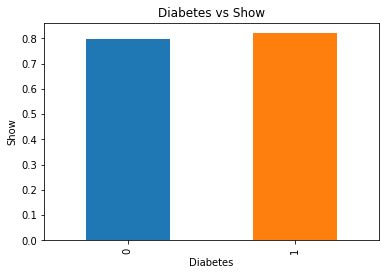

In [27]:
ax=df.groupby('Diabetes')["show"].mean().plot(kind="bar");
ax.set_ylabel("Show");
ax.set_xlabel("Diabetes");
ax.set_title("Diabetes vs Show");

### The figure above shows the relation between the show appoinment column and the Diabetes column , we can see that people with Diabetes has slightly higher show appointment ratio

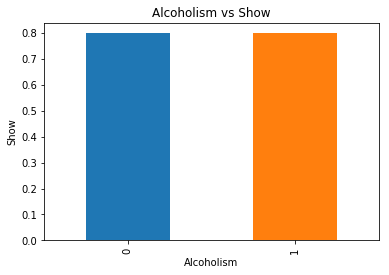

In [28]:
#df.groupby('Alcoholism')["No-show"].count()
ax=df.groupby('Alcoholism')["show"].mean().plot(kind="bar");
ax.set_ylabel("Show");
ax.set_xlabel("Alcoholism");
ax.set_title("Alcoholism vs Show");

### The figure above shows the relation between the show appoinment column and the Alcoholism column , we can see that the Alcoholism column doesn't affect the show appointment column

In [29]:
df.groupby('Handcap')["show"].count()
df.groupby('SMS_received')["show"].count()

SMS_received
0    75039
1    35482
Name: show, dtype: int64

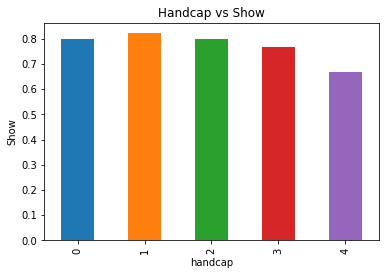

In [30]:
ax=df.groupby('Handcap')["show"].mean().plot(kind='bar');
ax.set_xlabel("handcap");
ax.set_ylabel("Show");
ax.set_title("Handcap vs Show");

### The figure above shows the relation between the show appoinment column and the handcap column.

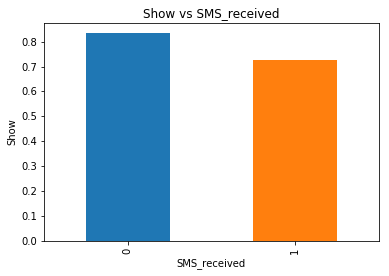

In [31]:
ax=df.groupby('SMS_received')["show"].mean().plot(kind='bar');
ax.set_ylabel("Show");
ax.set_xlabel("SMS_received");
ax.set_title("Show vs SMS_received");

### The figure above shows the relation between the show appoinment column and the Diabetes column , we can see that people who recieve sms has slightly lower show appointment ratio

### Q2:Does the age contributes in the probability of having different diseases

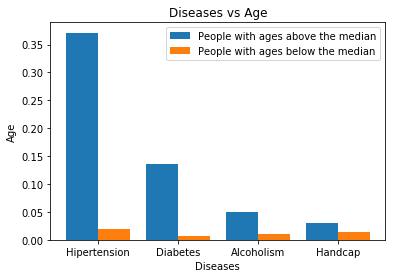

Hipertension    0.371177
Diabetes        0.136197
Alcoholism      0.050571
Handcap         0.030979
dtype: float64
Hipertension    0.019000
Diabetes        0.005936
Alcoholism      0.009729
Handcap         0.013265
dtype: float64


In [32]:
diseases=['Hipertension','Diabetes','Alcoholism','Handcap']
k1=df.query('Age >= Age.median()')[diseases].mean()
k2=df.query('Age < Age.median()')[diseases].mean()
x_axis=np.arange(len(diseases))
plt.figure()
plt.bar(x_axis-0.2,k1.values,0.4,label="People with ages above the median")
plt.bar(x_axis+0.2,k2.values,0.4,label="People with ages below the median")
plt.xlabel("diseases")
plt.xticks(x_axis,diseases)
plt.legend()
plt.title("Diseases vs Age")
plt.xlabel("Diseases")
plt.ylabel("Age")
plt.show()
print(k1)
print(k2)

### From the figure above we can see that people with higher ages has much higher ratio of all the diseases than people with lower ages and that make sense.

### Q3:Does the gender contributes in the probability of having different diseases

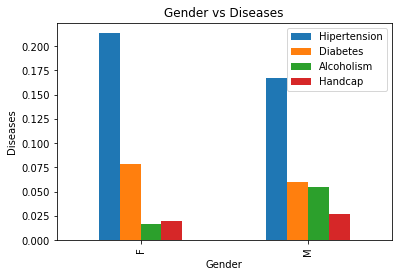

In [33]:
ax=df.groupby('Gender')[diseases].mean().plot(kind='bar');
ax.set_ylabel("Diseases");
ax.set_xlabel("Gender");
ax.set_title("Gender vs Diseases");

### From the figure above we can see the relation between gender and different disease , it seems that hipertension and diabetes has higher ratio in females while alcoholism and handcap has higher ratio in males

<a id='conclusions'></a>
## Conclusions
### From the first question we can conclude that the show appointment column is most affected by the difference of days between the the appointment date and the scheduled date

### From the second question we conclude that people with higher ages has much more ratio in all different diseases than people with lower ages

### From the third question we can conclude that Females has more common diseases such as hipertension and diabetes while Males has more common diseases such as alcholism and handcap


## Limitations
### Neighborhood column represents the location name not a distance from the patient to the location so that column will not be helpful to make insights

### Most of the columns values are categorical which will not help to make correlations

### The different diseases values are given as boolean (True or False), lets talk for example about diabtes column it is given as if the patient is diabtes or not while it should be given as the percentage of sugar in blood to be more meaningful

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0